# Climate Prediction Best Results

In [1]:
import pandas as pd
import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    get_info_experiment,
    summarize_best_results_by_index,
    summarize_all_results,
    plot_average_best_results,
    plot_best_results_per_season,
    PredictionExperiment
)

c:\Users\marti\Desktop\data\hw_extra


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
def display_full(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', '{:,.4f}'.format):  # more options can be specified also
        display(df)

In [4]:
my_indices_path = "data/my_indices/metadata.csv"
extra_indices_path = "data/extra_indices/metadata.csv"

## California

In [5]:
features = ["locally", "summer", "climate"]
region = "california"


In [6]:
metadata_all = pd.DataFrame()
for feat in features:
    metadata_exp_path = f"data/{feat}_features/{region}/metadata.csv"
    metadata = pd.read_csv(metadata_exp_path)
    metadata.rename(columns={"id":"id_data"}, inplace=True)
    metadata["source"] = feat
    if feat != "locally":
        metadata["stations"] = f"10_{region}"
    metadata_all = pd.concat((metadata_all, metadata))

metadata_all


,id_data,filename,season,indices,stations,source
0,355d8add,predictor_355d8add_1.parquet,1,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00040983,locally
1,355d8add,predictor_355d8add_2.parquet,2,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00040983,locally
2,355d8add,predictor_355d8add_3.parquet,3,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00040983,locally
3,355d8add,predictor_355d8add_4.parquet,4,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00040983,locally
4,355d8add,predictor_355d8add_5.parquet,5,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00040983,locally
...,...,...,...,...,...,...
19,5cb3fa02,predictor_5cb3fa02_8.parquet,8,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...,10_california,climate
20,5cb3fa02,predictor_5cb3fa02_9.parquet,9,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...,10_california,climate
21,5cb3fa02,predictor_5cb3fa02_10.parquet,10,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...,10_california,climate
22,5cb3fa02,predictor_5cb3fa02_11.parquet,11,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...,10_california,climate


In [7]:
source_results = ["locally", "summer", "climate", "labelly", "climate_NN"]

In [8]:
results_all = pd.DataFrame()
for source in source_results:
    if source == "labelly":
        results_freq = pd.read_csv(f"data/{source}_results/{region}_results/results_frequency.csv")
        results_freq["source"] = "labelly_freq"
        results_int = pd.read_csv(f"data/{source}_results/{region}_results/results_intensity.csv")
        results_int["source"] = "labelly_int"
        results_all = pd.concat((results_all, results_freq, results_int))
    else:
        results = pd.read_csv(f"data/{source}_results/{region}_results/results.csv")
        results["source"] = source
        results_all = pd.concat((results_all, results))
results_all.isna().sum()

model         0
season        0
metric        0
stage         0
HWN        2880
HWF        2880
HWD        2880
HWM        2880
HWA        2880
Average       0
id_data       0
source        0
dtype: int64

In [9]:
# Example usage
summary_r2 = summarize_all_results(results_all, metadata_all, metric="r2", top_n=2, stage="prediction")
summary_mape = summarize_all_results(results_all, metadata_all, metric="mape", top_n=2, stage="prediction")
summary_mae = summarize_all_results(results_all, metadata_all, metric="mae", top_n=2, stage="prediction")
summary_cv_r2 = summarize_all_results(results_all, metadata_all, metric="r2", top_n=2, stage="CV")
summary_cv_mape = summarize_all_results(results_all, metadata_all, metric="mape", top_n=2, stage="CV")
summary_cv_mae = summarize_all_results(results_all, metadata_all, metric="mae", top_n=2, stage="CV")
summary_tscv_r2 = summarize_all_results(results_all, metadata_all, metric="r2", top_n=2, stage="TSCV")
summary_tscv_mape = summarize_all_results(results_all, metadata_all, metric="mape", top_n=2, stage="TSCV")
summary_tscv_mae = summarize_all_results(results_all, metadata_all, metric="mae", top_n=2, stage="TSCV")

In [10]:
cv_r2_seasons = {}
cv_mape_seasons = {}
cv_mae_seasons = {}
r2_seasons = {}
mape_seasons = {}
tscv_r2_seasons = {}
tscv_mape_seasons = {}
for i in range(13):
    results_season = results_all[results_all["season"]==i]
    cv_r2_seasons[i] = summarize_all_results(results_season, metadata_all, metric="r2",stage="CV" , top_n=1)
    tscv_r2_seasons[i] = summarize_all_results(results_season, metadata_all, metric="r2",stage="TSCV" , top_n=1)
    r2_seasons[i] = summarize_all_results(results_season, metadata_all, metric="r2",stage="prediction", top_n=1)
    mape_seasons[i] = summarize_all_results(results_season, metadata_all, metric="mape",stage="prediction", top_n=1)
    cv_mape_seasons[i] = summarize_all_results(results_season, metadata_all, metric="mape",stage="CV", top_n=1)
    cv_mae_seasons[i] = summarize_all_results(results_season, metadata_all, metric="mae",stage="CV", top_n=1)
    tscv_mape_seasons[i] = summarize_all_results(results_season, metadata_all, metric="mape",stage="TSCV", top_n=1)

cv_r2_seasons = pd.concat(list(cv_r2_seasons.values()))
cv_mape_seasons = pd.concat(list(cv_mape_seasons.values()))
cv_mae_seasons = pd.concat(list(cv_mae_seasons.values()))
tscv_r2_seasons = pd.concat(list(tscv_r2_seasons.values()))
tscv_mape_seasons = pd.concat(list(tscv_mape_seasons.values()))
r2_seasons = pd.concat(list(r2_seasons.values()))
mape_seasons = pd.concat(list(mape_seasons.values()))


In [11]:
display_full(cv_mae_seasons)

,model,index,best_value,id_data,season,indices,stations,source
0,CNNRNN16,Average,0.4393,aa74505a,1,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00041244,locally
1,CNNRNN16,HWA,0.4504,aa74505a,1,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00041244,locally
2,CNNRNN16,HWD,0.4464,aa74505a,1,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00041244,locally
3,CNNRNN16,HWF,0.3864,aa74505a,1,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00041244,locally
4,CNNRNN16,HWM,0.4692,aa74505a,1,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00041244,locally
5,Linear,HWN,0.3300,5cb3fa02,1,fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...,10_california,climate
0,CNNRNN16,Average,0.5587,37aa5f1e,2,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00040931,locally
1,MLP16,HWA,0.5699,7828ad33,2,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00040741,locally
2,CNNRNN16,HWD,0.5364,37aa5f1e,2,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00040931,locally
3,CNNLSTM16,HWF,0.4884,072d4a2e,2,775d0d46-00376815-a6cfee77-e4199a9f-e15d8862-8...,USC00041277,locally


## Chile

In [12]:
features = ["locally", "summer", "climate", "labelly_freq", "labelly_int"]
region = "chile"


In [19]:
metadata_all = pd.DataFrame()
for feat in features:
    if "labelly" in feat:
        metadata_exp_path = f"data/climate_features/{region}/metadata.csv"
    else:
        metadata_exp_path = f"data/{feat}_features/{region}/metadata.csv"
    metadata = pd.read_csv(metadata_exp_path)
    metadata.rename(columns={"id":"id_data"}, inplace=True)
    metadata["source"] = feat
    if feat != "locally":
        metadata["stations"] = f"10_{region}"
    metadata_all = pd.concat((metadata_all, metadata))

metadata_all = metadata_all[metadata_all["stations"]=="chile_central_norte"]


In [20]:
source_results = ["locally", "summer", "climate", "labelly", "climate_NN"]

In [21]:
results_all = pd.DataFrame()
for source in source_results:
    if source == "labelly":
        results_freq = pd.read_csv(f"data/{source}_results/{region}_results/results_frequency.csv")
        results_freq["source"] = "labelly_freq"
        results_int = pd.read_csv(f"data/{source}_results/{region}_results/results_intensity.csv")
        results_int["source"] = "labelly_int"
        results_all = pd.concat((results_all, results_freq, results_int))
    else:
        results = pd.read_csv(f"data/{source}_results/{region}_results/results.csv")
        results["source"] = source
        results_all = pd.concat((results_all, results))
results_all.isna().sum()

# results_all = results_all[results_all["stations"]=="chile_central_norte"]
results_all

,model,season,metric,stage,HWN,HWF,HWD,HWM,HWA,Average,id_data,source
0,Linear,1,r2,prediction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41e7367e,locally
1,RF10,1,r2,prediction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41e7367e,locally
2,SVR-rbf,1,r2,prediction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41e7367e,locally
3,SVR-linear,1,r2,prediction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41e7367e,locally
4,XGB10,1,r2,prediction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41e7367e,locally
...,...,...,...,...,...,...,...,...,...,...,...,...
32251,Linear,8,mae,TSCV,0.378467,1.550969,1.094913,0.762787,1.455566,1.048540,458d357c,climate_NN
32252,Linear,9,mae,TSCV,0.262776,1.020800,0.861764,0.635964,1.014843,0.759230,458d357c,climate_NN
32253,Linear,10,mae,TSCV,0.240909,0.892987,0.765239,0.515215,0.889996,0.660869,458d357c,climate_NN
32254,Linear,11,mae,TSCV,0.198708,0.670160,0.521324,0.291885,0.598814,0.456178,458d357c,climate_NN


In [22]:
# Example usage
summary_r2 = summarize_all_results(results_all, metadata_all, metric="r2", top_n=2, stage="prediction")
summary_mape = summarize_all_results(results_all, metadata_all, metric="mape", top_n=2, stage="prediction")
summary_mae = summarize_all_results(results_all, metadata_all, metric="mae", top_n=2, stage="prediction")
summary_cv_r2 = summarize_all_results(results_all, metadata_all, metric="r2", top_n=2, stage="CV")
summary_cv_mape = summarize_all_results(results_all, metadata_all, metric="mape", top_n=2, stage="CV")
summary_cv_mae = summarize_all_results(results_all, metadata_all, metric="mae", top_n=2, stage="CV")
summary_tscv_r2 = summarize_all_results(results_all, metadata_all, metric="r2", top_n=2, stage="TSCV")
summary_tscv_mape = summarize_all_results(results_all, metadata_all, metric="mape", top_n=2, stage="TSCV")
summary_tscv_mae = summarize_all_results(results_all, metadata_all, metric="mae", top_n=2, stage="TSCV")

In [23]:
cv_r2_seasons = {}
cv_mape_seasons = {}
cv_mae_seasons = {}
r2_seasons = {}
mape_seasons = {}
tscv_r2_seasons = {}
tscv_mape_seasons = {}
for i in range(13):
    results_season = results_all[results_all["season"]==i]
    cv_r2_seasons[i] = summarize_all_results(results_season, metadata_all, metric="r2",stage="CV" , top_n=1)
    tscv_r2_seasons[i] = summarize_all_results(results_season, metadata_all, metric="r2",stage="TSCV" , top_n=1)
    r2_seasons[i] = summarize_all_results(results_season, metadata_all, metric="r2",stage="prediction", top_n=1)
    mape_seasons[i] = summarize_all_results(results_season, metadata_all, metric="mape",stage="prediction", top_n=1)
    cv_mape_seasons[i] = summarize_all_results(results_season, metadata_all, metric="mape",stage="CV", top_n=1)
    cv_mae_seasons[i] = summarize_all_results(results_season, metadata_all, metric="mae",stage="CV", top_n=1)
    tscv_mape_seasons[i] = summarize_all_results(results_season, metadata_all, metric="mape",stage="TSCV", top_n=1)

cv_r2_seasons = pd.concat(list(cv_r2_seasons.values()))
cv_mape_seasons = pd.concat(list(cv_mape_seasons.values()))
cv_mae_seasons = pd.concat(list(cv_mae_seasons.values()))
tscv_r2_seasons = pd.concat(list(tscv_r2_seasons.values()))
tscv_mape_seasons = pd.concat(list(tscv_mape_seasons.values()))
r2_seasons = pd.concat(list(r2_seasons.values()))
mape_seasons = pd.concat(list(mape_seasons.values()))


In [24]:
display_full(cv_mae_seasons)

,model,index,best_value,id_data,season,indices,stations,source
0,CNNRNN16,Average,0.3164,e0ec7330,1,NaN,NaN,locally
1,CNNRNN16,HWA,0.3102,6ed90f1e,1,NaN,NaN,locally
2,CNNRNN16,HWD,0.2830,e0ec7330,1,NaN,NaN,locally
3,CNNRNN16,HWF,0.2976,e0ec7330,1,NaN,NaN,locally
4,Linear,HWM,0.3132,b33fc639,1,NaN,NaN,climate
5,Linear,HWN,0.1921,4effa258,1,NaN,NaN,climate
0,CNNRNN16,Average,0.3114,6ed90f1e,2,NaN,NaN,locally
1,CNNRNN16,HWA,0.2929,6ed90f1e,2,NaN,NaN,locally
2,CNNRNN16,HWD,0.3178,6ed90f1e,2,NaN,NaN,locally
3,CNNRNN16,HWF,0.3076,6ed90f1e,2,NaN,NaN,locally


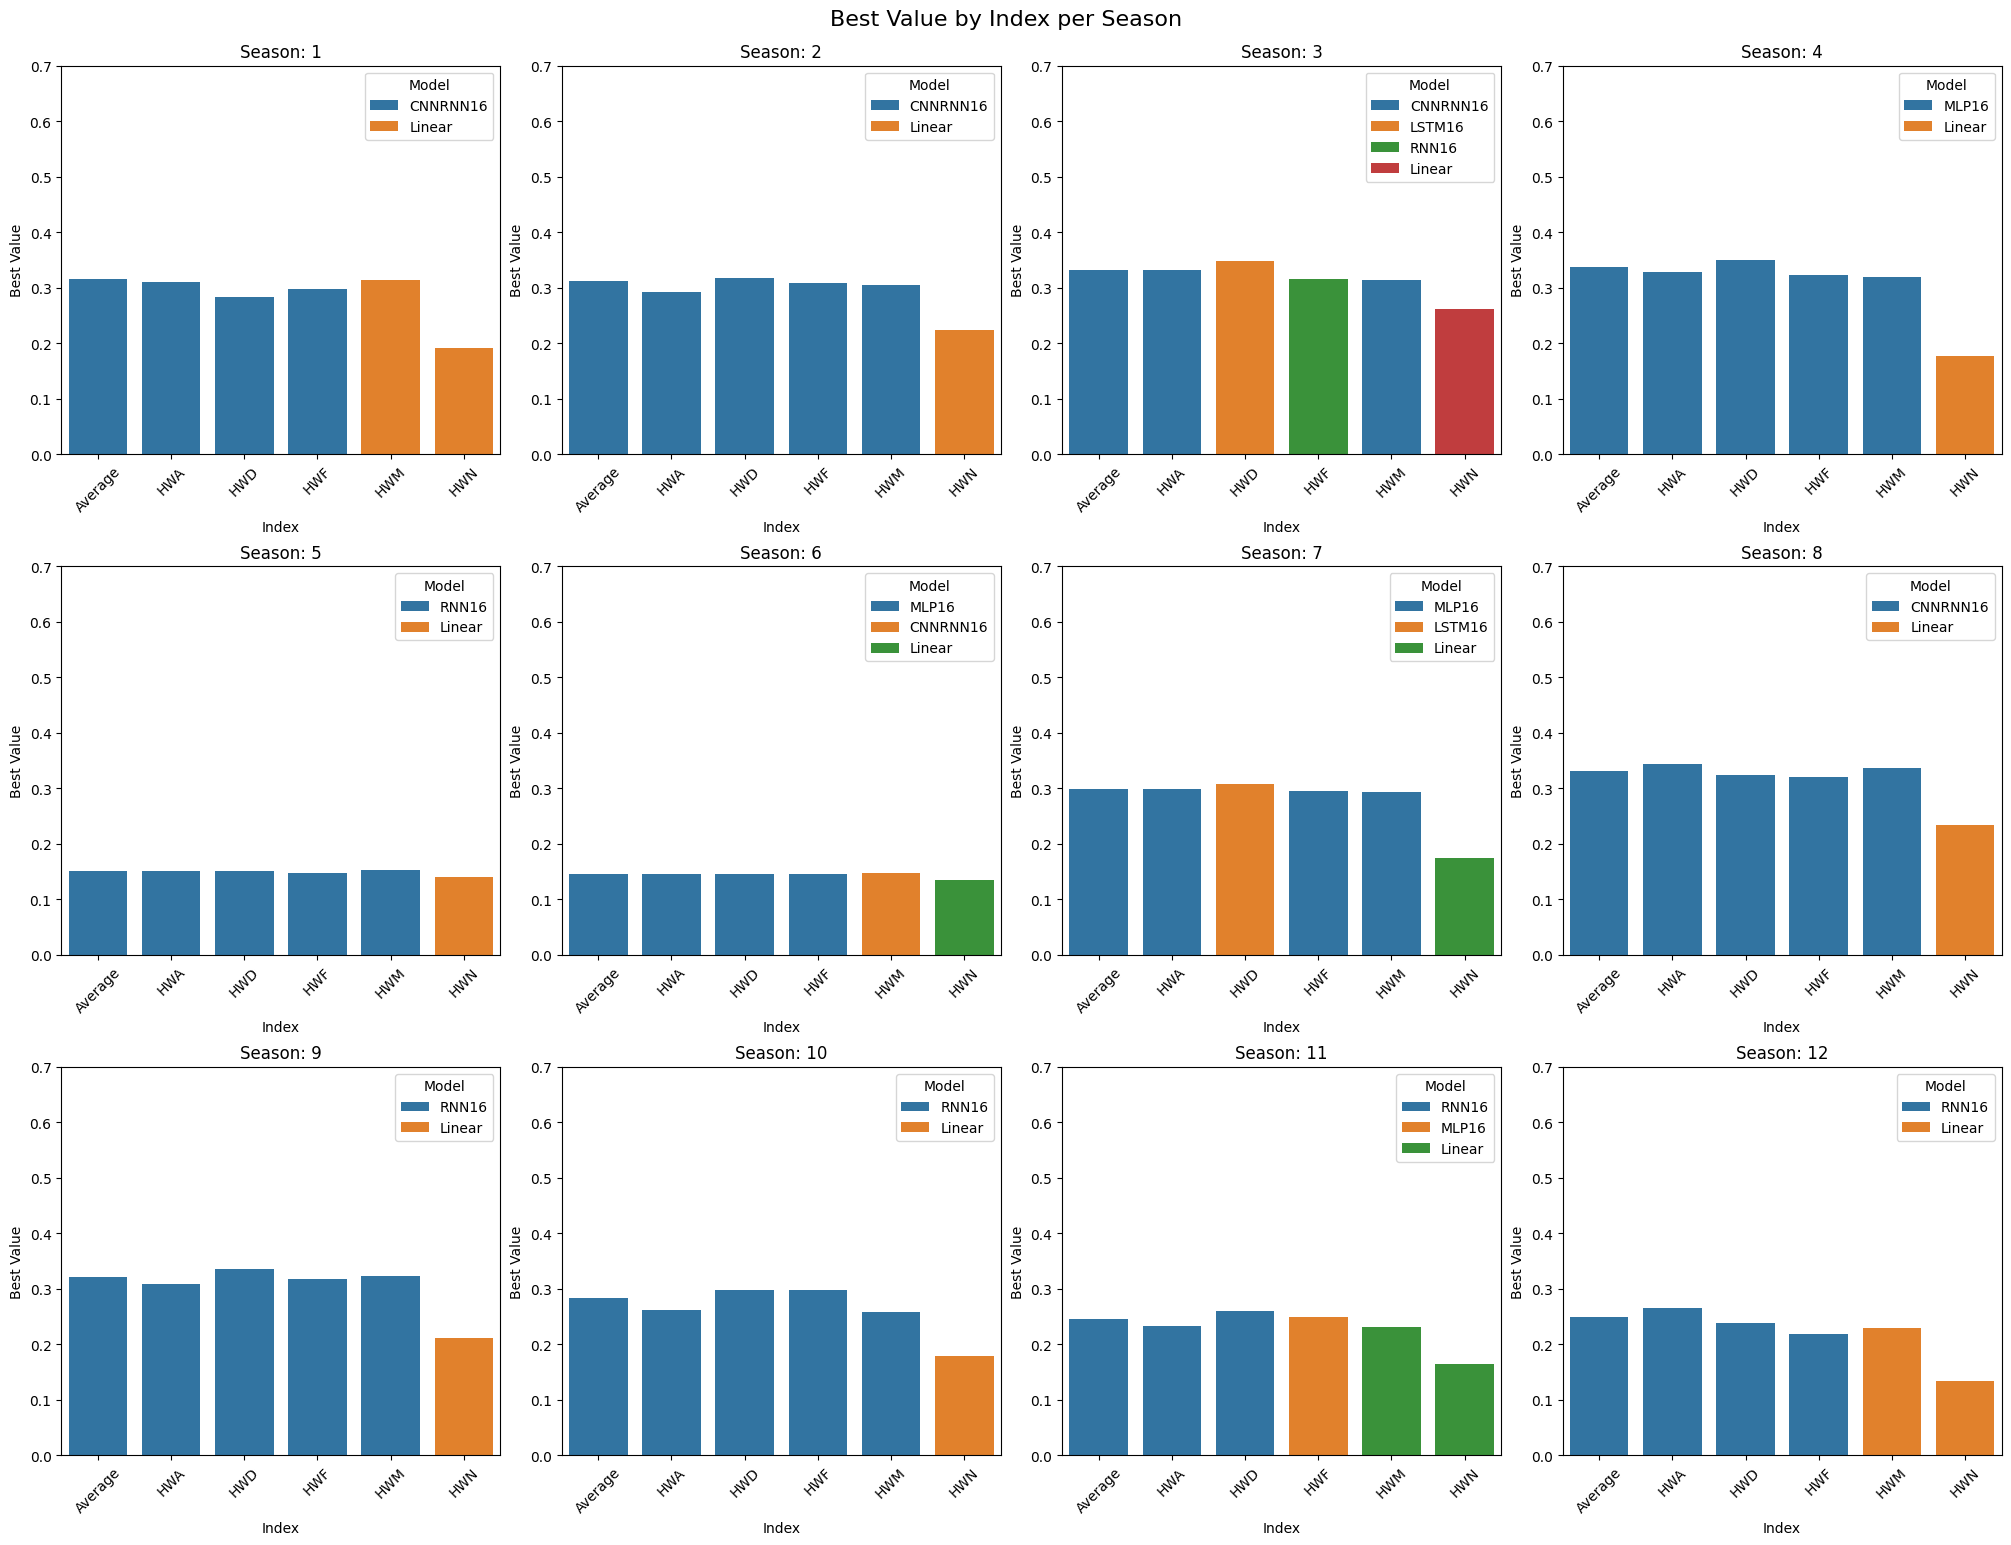

In [19]:
# Ensure best_value is float
df = cv_mae_seasons
# Make sure 'best_value' is float
df['best_value'] = df['best_value'].astype(float)

# Set up the plot grid
unique_seasons = sorted(df['season'].unique())
n_cols = 4
n_rows = -(-len(unique_seasons) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

# Create barplot for each season
for i, season in enumerate(unique_seasons):
    ax = axes[i]
    season_df = df[df['season'] == season]
    sns.barplot(data=season_df, x='index', y='best_value', hue='model', ax=ax)
    ax.set_ylim([0,0.7])
    ax.set_title(f'Season: {season}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Best Value')
    ax.tick_params(axis='x', rotation=45)
    ax.legend().set_title('Model')

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Best Value by Index per Season', fontsize=16, y=1.02)
plt.show()